# Bar charts and Histograms

In [1]:
# Import pyplot for plotting
import matplotlib.pyplot as plt

# Import pandas for data frames
import pandas as pd

# Import numpy for numerical arrays
import numpy as np


In [2]:
# Change the style of plots
plt.style.use('classic')

# Change default figure size
plt.rcParams['figure.figsize'] = (14,8)

<br>

## Bar charts
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

In [3]:
# Load the Iris dataset
df = pd.read_csv('https://raw.githubusercontent.com/ssteffens/pands-project2021/main/iris.data', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Extract the value counts for the species
counts = df['species'].value_counts()
counts

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
# Extract the categories
categories = counts.index
categories

Index(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype='object')

<BarContainer object of 3 artists>

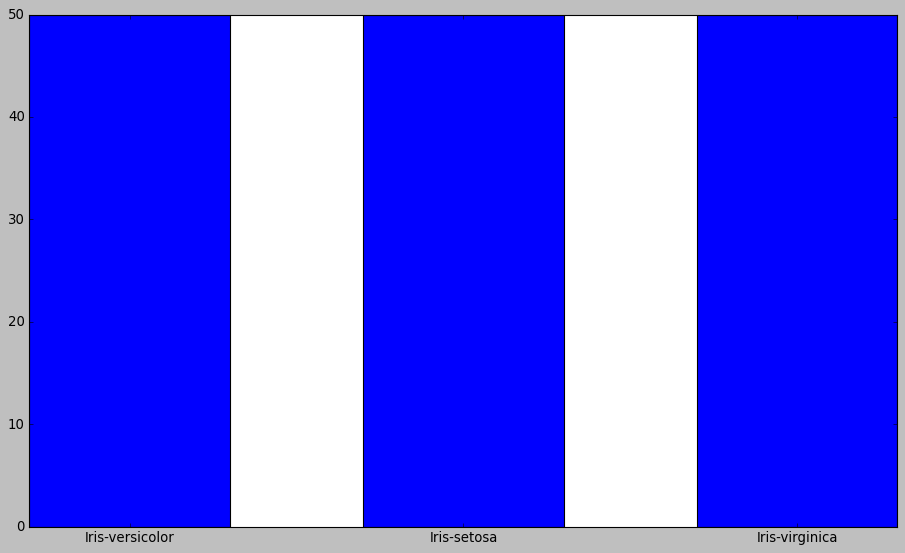

In [6]:
# Create a bar chart of count of categories
# Two mandatory parameters: x and height
plt.bar(x = categories, height = counts, width = 0.6)

In [7]:
# Extract petal width of Setosas
df_setosa = df[df['species'] == 'Iris-setosa']
petals = df_setosa['petal_width']
petals

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64

In [8]:
# Get the value counts of the setosa petal width
petal_counts = petals.value_counts()
petal_counts

0.2    29
0.4     7
0.3     7
0.1     5
0.5     1
0.6     1
Name: petal_width, dtype: int64

<BarContainer object of 6 artists>

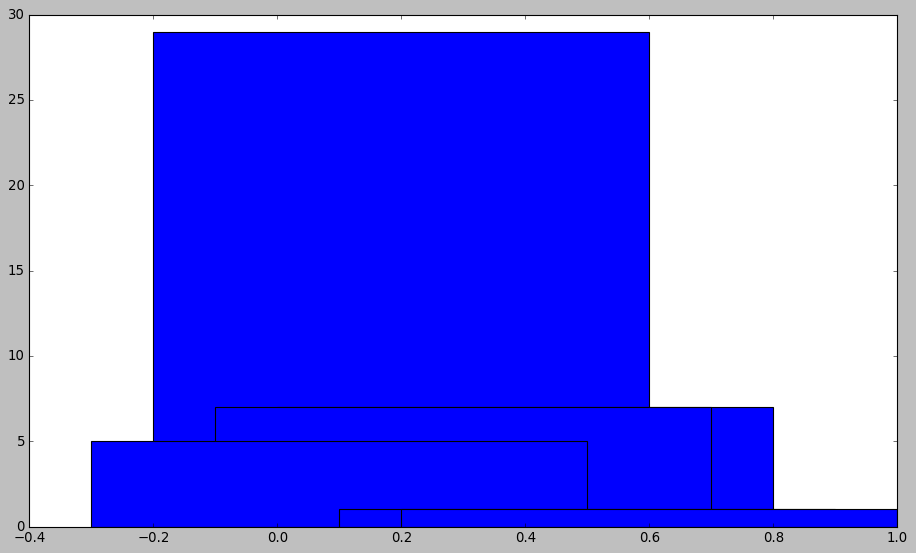

In [9]:
# Create a bar chart
plt.bar(petal_counts.index, petal_counts)

<BarContainer object of 6 artists>

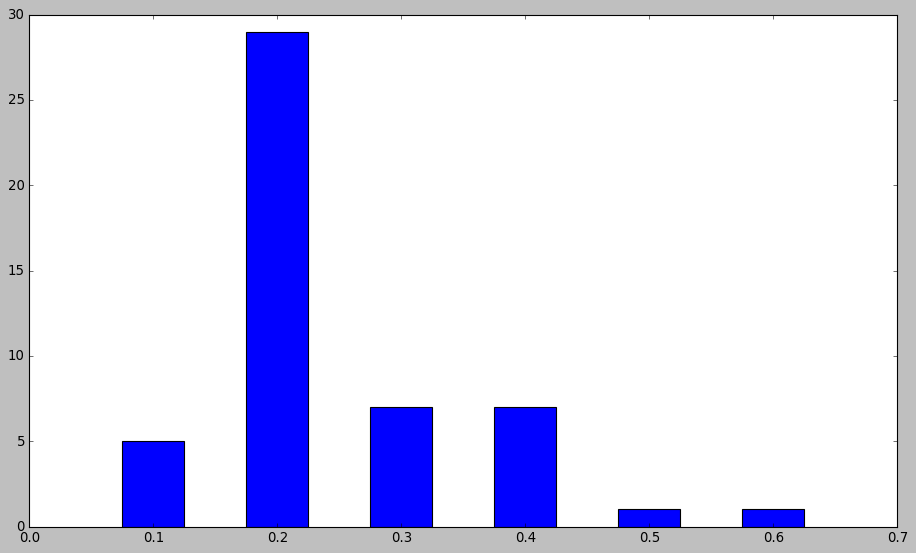

In [10]:
# As the categories (x) are numbers, pyplot uses them as locations on the x-axis with the bars centered around each x value
# To change the weird look of the above
plt.bar(petal_counts.index, petal_counts, width=0.05)

<br>

## Histograms
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [11]:
# Histogram of sepal_length
# 1 mandatory parameter: x (array of data)

sepal_length = df['sepal_length']
sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

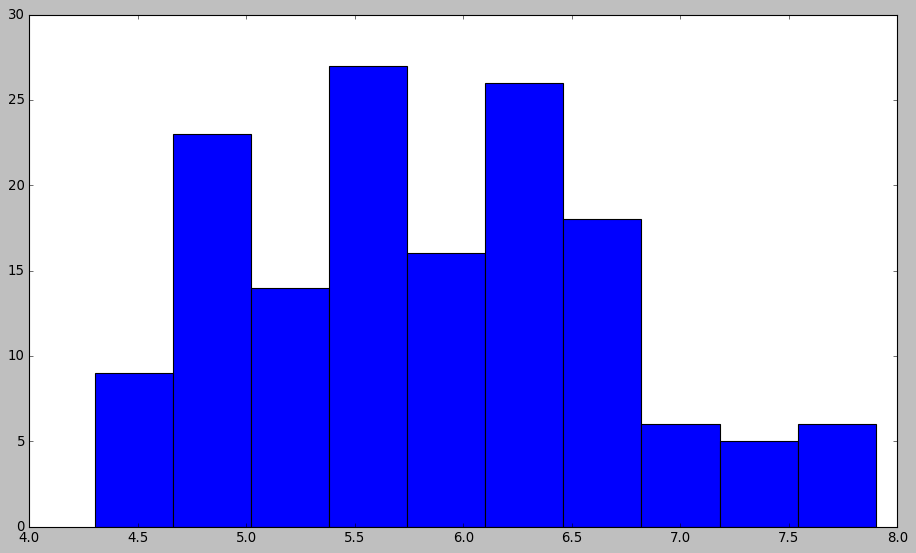

In [12]:
plt.hist(sepal_length)

# Output is a tuple below (2 arrays (height and edge values of x) and barContainer)

In [13]:
# pyplot takes lowest and highest value from data range and splits it into 10 parts (default 10 bins)
# right-most value of the bin is not included in the left but in the right bin, for example a value 4.66 would be in the second bin rather than the first
# Exception to the above is the very last bin which includes the highest value
sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

(array([0.16666667, 0.42592593, 0.25925926, 0.5       , 0.2962963 ,
        0.48148148, 0.33333333, 0.11111111, 0.09259259, 0.11111111]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

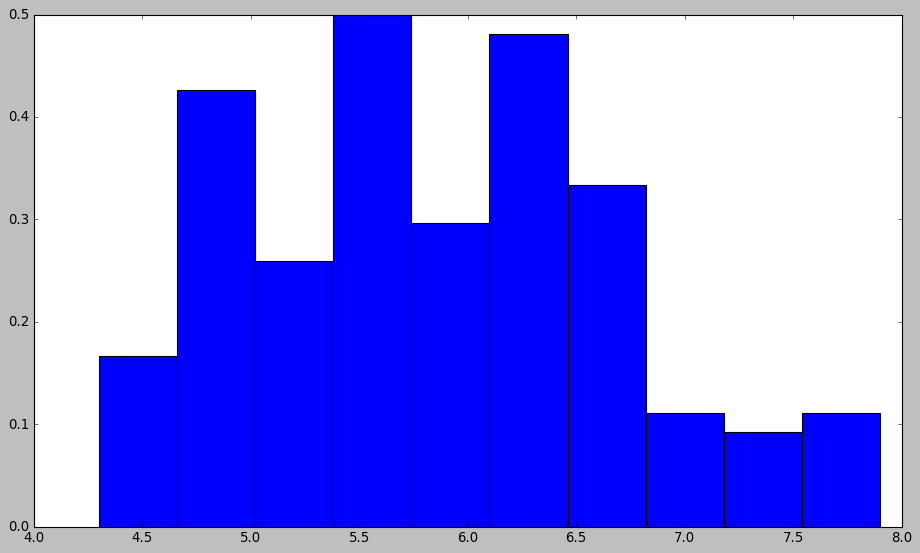

In [14]:
# Setting density to true changes the y-axis to display probability density:
# each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
plt.hist(sepal_length, density = True)

In [15]:
# Separate the species for sepal length
df_setosa = df[df['species'] == 'Iris-setosa']['sepal_length'].to_numpy()
df_versicolor = df[df['species'] == 'Iris-versicolor']['sepal_length'].to_numpy()
df_virginica = df[df['species'] == 'Iris-virginica']['sepal_length'].to_numpy()

In [16]:
# Create a 2-D array of 3 values of sepal length by species
# .T transposes the array
x = np.vstack([df_setosa, df_versicolor, df_virginica]).T
x

array([[5.1, 7. , 6.3],
       [4.9, 6.4, 5.8],
       [4.7, 6.9, 7.1],
       [4.6, 5.5, 6.3],
       [5. , 6.5, 6.5],
       [5.4, 5.7, 7.6],
       [4.6, 6.3, 4.9],
       [5. , 4.9, 7.3],
       [4.4, 6.6, 6.7],
       [4.9, 5.2, 7.2],
       [5.4, 5. , 6.5],
       [4.8, 5.9, 6.4],
       [4.8, 6. , 6.8],
       [4.3, 6.1, 5.7],
       [5.8, 5.6, 5.8],
       [5.7, 6.7, 6.4],
       [5.4, 5.6, 6.5],
       [5.1, 5.8, 7.7],
       [5.7, 6.2, 7.7],
       [5.1, 5.6, 6. ],
       [5.4, 5.9, 6.9],
       [5.1, 6.1, 5.6],
       [4.6, 6.3, 7.7],
       [5.1, 6.1, 6.3],
       [4.8, 6.4, 6.7],
       [5. , 6.6, 7.2],
       [5. , 6.8, 6.2],
       [5.2, 6.7, 6.1],
       [5.2, 6. , 6.4],
       [4.7, 5.7, 7.2],
       [4.8, 5.5, 7.4],
       [5.4, 5.5, 7.9],
       [5.2, 5.8, 6.4],
       [5.5, 6. , 6.3],
       [4.9, 5.4, 6.1],
       [5. , 6. , 7.7],
       [5.5, 6.7, 6.3],
       [4.9, 6.3, 6.4],
       [4.4, 5.6, 6. ],
       [5.1, 5.5, 6.9],
       [5. , 5.5, 6.7],
       [4.5, 6.1

(array([[ 9., 19., 12.,  9.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  2., 16.,  9., 11.,  7.,  2.,  0.,  0.],
        [ 0.,  1.,  0.,  2.,  6., 15., 11.,  4.,  5.,  6.]]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 3 BarContainer objects>)

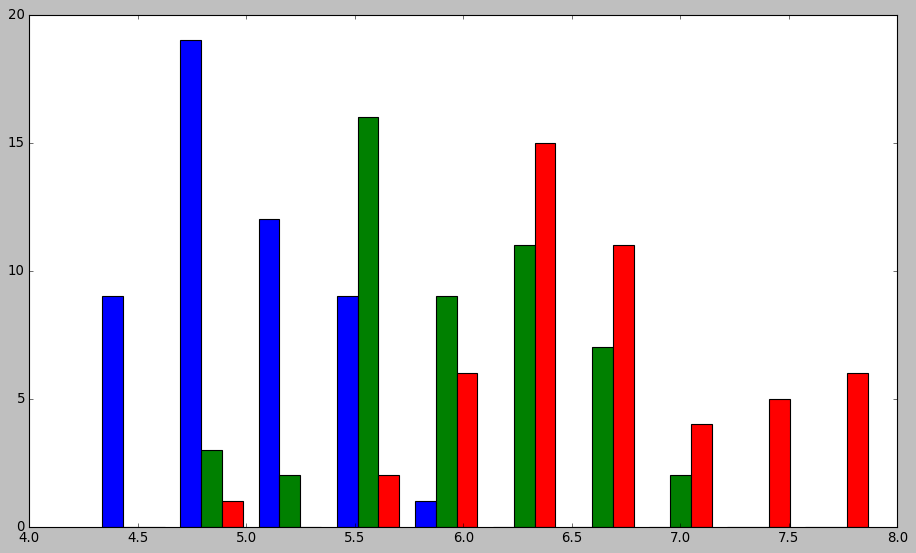

In [17]:
# Plot a weird looking histogram with all 3 species
plt.hist(x)

(array([[ 9., 19., 12.,  9.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 9., 22., 14., 25., 10., 11.,  7.,  2.,  0.,  0.],
        [ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 3 BarContainer objects>)

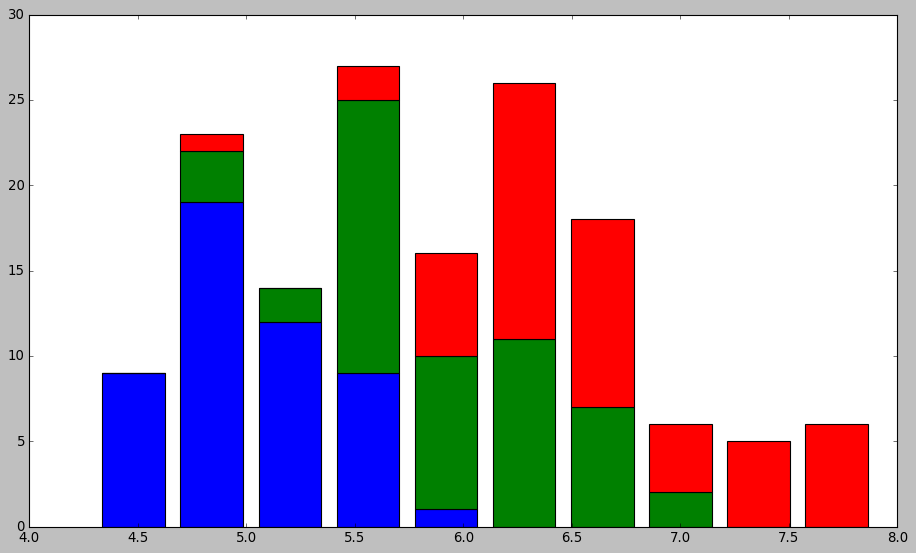

In [18]:
# Plot a stacked histogram
plt.hist(x, stacked = True)